pandas, sklearn.cluster에서 KMeans, matplotlib.pyplot을 import 한다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline

아래의 코드로 iris 데이터를 불러온다. array를 활용할 수도 있지만 거의 pandas를 많이쓰게될 것이니 pandas의 DataFrame으로 불러들이자.  
(경로는 개인환경에 맞게 설정한다.)

In [2]:
iris = pd.read_csv('C:\\Users\\KBS\\Dropbox\\개인자료\\ml_python\\cluster analysis\\iris.csv')

R에서의 data.frame 객체의 윗단을 보는 명령어 pandas에서는 DataFrame에서의 method 형태로 구현된다.

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


iris data는 4차원의 데이터이지만 시각화를 위해 2차원으로 활용하도록 하자. 사용할 변수는 Sepal.Length와 Sepal.Width이다.
다음의 코드로 Sepal.Length, Sepal.Width, Species를 선택하여 data라는 객체로 저장한다.

In [4]:
data = iris.ix[:,[0,1,4]]
data.head()

,Sepal.Length,Sepal.Width,Species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


먼저 kmeans 객체를 생성해주는데 kmeans 객체의 클래스는 sklearn.cluster.k_means_KMeans 이고
해당 클래스를 생성해준뒤 클래스의 method로 kmeans를 구현 할 수 있다. 객체를 생성할 때, kmeans의 여러 parameter setting을 할 수 있다.

In [5]:
kmeans = KMeans(n_clusters=3)
# 지금은 단순하게 iris 데이터의 Species가 3종이므로 k = 3으로 설정하였다.\

In [6]:
kmeans.fit(data.ix[:,:2]) #DataFrame 객체에서 복수의 column을 선택해야하는 경우 이 방법이 제일 편함!

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

아래의 코드로 kmeans의 결과물로 각 군집의 centroid와 instance에 붙여진 군집의 label을 centroids 객체와 labels 객체에 저장한다.

In [7]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

아래의 코드로 산점도를 그리고 각 군집의 centroid를 표시한다.

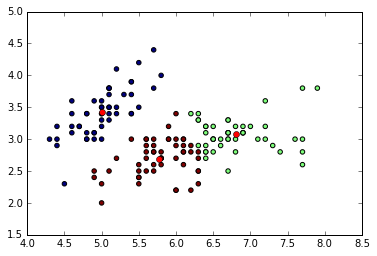

In [9]:
plt.scatter(x = data['Sepal.Length'], y = data['Sepal.Width'], c = labels)
plt.plot(centroids[:,0],centroids[:,1], 'ro')